In [1]:
import torch

In [2]:
t_c =  [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
def model(x, w, b):
    return w*x + b

In [4]:
def loss_fn(x, y):
    return ((x - y)**2).mean()

In [5]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [6]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [7]:
delta = 0.1

d_loss_d_w = \
(loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [8]:
d_loss_d_w

tensor(4517.2974)

In [9]:
learning_rate = 1e-2

w = w - learning_rate * d_loss_d_w

In [10]:
w

tensor(-44.1730)

In [11]:
d_loss_d_b = \
(loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

In [12]:
b = b - learning_rate * d_loss_d_b

In [13]:
b

tensor(46.)

In [14]:
def d_loss_fn(x, y):
    return 2*(x - y) / x.size(0)

In [15]:
def d_model_d_w(x, w, b):
    return x

def d_model_d_b(x, w, b):
    return 1.0

In [20]:
def grad_fn(x, y, t_p, w, b):
    dloss_dtp = d_loss_fn(t_p, y)
    dloss_dw = dloss_dtp * d_model_d_w(x, w, b)
    dloss_db = dloss_dtp * d_model_d_b(x, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [21]:
def training_loop(n_epochs, learning_rate, params, x, y):
    
    for epoch in range(1, n_epochs + 1):
        w, b = params
        
        t_p = model(x, w, b)
        
        loss = loss_fn(t_p, y)
        
        grad = grad_fn(x, y, t_p, w, b)
        
        params = params - learning_rate * grad
        
        print('Epoch %d \t Loss %f' % (epoch, float(loss)))
    
    return params

In [22]:
training_loop(n_epochs = 100, learning_rate=1e-2, params = torch.tensor([1.0, 0.0]),
              x = t_u, y = t_c)

Epoch 1 	 Loss 1763.884766
Epoch 2 	 Loss 5802484.500000
Epoch 3 	 Loss 19408029696.000000
Epoch 4 	 Loss 64915905708032.000000
Epoch 5 	 Loss 217130525461053440.000000
Epoch 6 	 Loss 726257583152928129024.000000
Epoch 7 	 Loss 2429183416467662896627712.000000
Epoch 8 	 Loss 8125122549611731432050262016.000000
Epoch 9 	 Loss 27176882120842590626938030653440.000000
Epoch 10 	 Loss 90901105189019073810297959556841472.000000
Epoch 11 	 Loss inf
Epoch 12 	 Loss inf
Epoch 13 	 Loss inf
Epoch 14 	 Loss inf
Epoch 15 	 Loss inf
Epoch 16 	 Loss inf
Epoch 17 	 Loss inf
Epoch 18 	 Loss inf
Epoch 19 	 Loss inf
Epoch 20 	 Loss inf
Epoch 21 	 Loss inf
Epoch 22 	 Loss inf
Epoch 23 	 Loss nan
Epoch 24 	 Loss nan
Epoch 25 	 Loss nan
Epoch 26 	 Loss nan
Epoch 27 	 Loss nan
Epoch 28 	 Loss nan
Epoch 29 	 Loss nan
Epoch 30 	 Loss nan
Epoch 31 	 Loss nan
Epoch 32 	 Loss nan
Epoch 33 	 Loss nan
Epoch 34 	 Loss nan
Epoch 35 	 Loss nan
Epoch 36 	 Loss nan
Epoch 37 	 Loss nan
Epoch 38 	 Loss nan
Epoch 39 	 Los

tensor([nan, nan])

In [23]:
training_loop(n_epochs = 100, learning_rate=1e-4, params = torch.tensor([1.0, 0.0]),
              x = t_u, y = t_c)

Epoch 1 	 Loss 1763.884766
Epoch 2 	 Loss 323.090515
Epoch 3 	 Loss 78.929634
Epoch 4 	 Loss 37.552845
Epoch 5 	 Loss 30.540283
Epoch 6 	 Loss 29.351154
Epoch 7 	 Loss 29.148884
Epoch 8 	 Loss 29.113848
Epoch 9 	 Loss 29.107145
Epoch 10 	 Loss 29.105247
Epoch 11 	 Loss 29.104168
Epoch 12 	 Loss 29.103222
Epoch 13 	 Loss 29.102295
Epoch 14 	 Loss 29.101379
Epoch 15 	 Loss 29.100466
Epoch 16 	 Loss 29.099548
Epoch 17 	 Loss 29.098631
Epoch 18 	 Loss 29.097717
Epoch 19 	 Loss 29.096796
Epoch 20 	 Loss 29.095881
Epoch 21 	 Loss 29.094959
Epoch 22 	 Loss 29.094049
Epoch 23 	 Loss 29.093134
Epoch 24 	 Loss 29.092216
Epoch 25 	 Loss 29.091301
Epoch 26 	 Loss 29.090385
Epoch 27 	 Loss 29.089464
Epoch 28 	 Loss 29.088551
Epoch 29 	 Loss 29.087635
Epoch 30 	 Loss 29.086714
Epoch 31 	 Loss 29.085804
Epoch 32 	 Loss 29.084888
Epoch 33 	 Loss 29.083967
Epoch 34 	 Loss 29.083057
Epoch 35 	 Loss 29.082142
Epoch 36 	 Loss 29.081221
Epoch 37 	 Loss 29.080309
Epoch 38 	 Loss 29.079390
Epoch 39 	 Loss 29

tensor([ 0.2327, -0.0438])

In [24]:
t_un = 0.1 * t_u

In [25]:
training_loop(n_epochs = 100, learning_rate=1e-2, params = torch.tensor([1.0, 0.0]),
              x = t_un, y = t_c)

Epoch 1 	 Loss 80.364342
Epoch 2 	 Loss 37.574913
Epoch 3 	 Loss 30.871077
Epoch 4 	 Loss 29.756193
Epoch 5 	 Loss 29.507153
Epoch 6 	 Loss 29.392456
Epoch 7 	 Loss 29.298828
Epoch 8 	 Loss 29.208717
Epoch 9 	 Loss 29.119415
Epoch 10 	 Loss 29.030489
Epoch 11 	 Loss 28.941877
Epoch 12 	 Loss 28.853565
Epoch 13 	 Loss 28.765553
Epoch 14 	 Loss 28.677851
Epoch 15 	 Loss 28.590431
Epoch 16 	 Loss 28.503319
Epoch 17 	 Loss 28.416498
Epoch 18 	 Loss 28.329973
Epoch 19 	 Loss 28.243742
Epoch 20 	 Loss 28.157804
Epoch 21 	 Loss 28.072151
Epoch 22 	 Loss 27.986797
Epoch 23 	 Loss 27.901728
Epoch 24 	 Loss 27.816950
Epoch 25 	 Loss 27.732464
Epoch 26 	 Loss 27.648256
Epoch 27 	 Loss 27.564344
Epoch 28 	 Loss 27.480707
Epoch 29 	 Loss 27.397362
Epoch 30 	 Loss 27.314295
Epoch 31 	 Loss 27.231512
Epoch 32 	 Loss 27.149010
Epoch 33 	 Loss 27.066790
Epoch 34 	 Loss 26.984844
Epoch 35 	 Loss 26.903175
Epoch 36 	 Loss 26.821791
Epoch 37 	 Loss 26.740679
Epoch 38 	 Loss 26.659838
Epoch 39 	 Loss 26.57

tensor([ 2.7553, -2.5162])

In [29]:
params = training_loop(n_epochs = 5000, learning_rate=1e-2, params = torch.tensor([1.0, 0.0]),
              x = t_un, y = t_c)

Epoch 1 	 Loss 80.364342
Epoch 2 	 Loss 37.574913
Epoch 3 	 Loss 30.871077
Epoch 4 	 Loss 29.756193
Epoch 5 	 Loss 29.507153
Epoch 6 	 Loss 29.392456
Epoch 7 	 Loss 29.298828
Epoch 8 	 Loss 29.208717
Epoch 9 	 Loss 29.119415
Epoch 10 	 Loss 29.030489
Epoch 11 	 Loss 28.941877
Epoch 12 	 Loss 28.853565
Epoch 13 	 Loss 28.765553
Epoch 14 	 Loss 28.677851
Epoch 15 	 Loss 28.590431
Epoch 16 	 Loss 28.503319
Epoch 17 	 Loss 28.416498
Epoch 18 	 Loss 28.329973
Epoch 19 	 Loss 28.243742
Epoch 20 	 Loss 28.157804
Epoch 21 	 Loss 28.072151
Epoch 22 	 Loss 27.986797
Epoch 23 	 Loss 27.901728
Epoch 24 	 Loss 27.816950
Epoch 25 	 Loss 27.732464
Epoch 26 	 Loss 27.648256
Epoch 27 	 Loss 27.564344
Epoch 28 	 Loss 27.480707
Epoch 29 	 Loss 27.397362
Epoch 30 	 Loss 27.314295
Epoch 31 	 Loss 27.231512
Epoch 32 	 Loss 27.149010
Epoch 33 	 Loss 27.066790
Epoch 34 	 Loss 26.984844
Epoch 35 	 Loss 26.903175
Epoch 36 	 Loss 26.821791
Epoch 37 	 Loss 26.740679
Epoch 38 	 Loss 26.659838
Epoch 39 	 Loss 26.57

Epoch 308 	 Loss 12.403256
Epoch 309 	 Loss 12.371090
Epoch 310 	 Loss 12.339031
Epoch 311 	 Loss 12.307082
Epoch 312 	 Loss 12.275247
Epoch 313 	 Loss 12.243509
Epoch 314 	 Loss 12.211887
Epoch 315 	 Loss 12.180370
Epoch 316 	 Loss 12.148962
Epoch 317 	 Loss 12.117657
Epoch 318 	 Loss 12.086462
Epoch 319 	 Loss 12.055373
Epoch 320 	 Loss 12.024384
Epoch 321 	 Loss 11.993508
Epoch 322 	 Loss 11.962731
Epoch 323 	 Loss 11.932056
Epoch 324 	 Loss 11.901492
Epoch 325 	 Loss 11.871029
Epoch 326 	 Loss 11.840671
Epoch 327 	 Loss 11.810413
Epoch 328 	 Loss 11.780257
Epoch 329 	 Loss 11.750208
Epoch 330 	 Loss 11.720258
Epoch 331 	 Loss 11.690412
Epoch 332 	 Loss 11.660664
Epoch 333 	 Loss 11.631015
Epoch 334 	 Loss 11.601473
Epoch 335 	 Loss 11.572030
Epoch 336 	 Loss 11.542686
Epoch 337 	 Loss 11.513440
Epoch 338 	 Loss 11.484293
Epoch 339 	 Loss 11.455246
Epoch 340 	 Loss 11.426300
Epoch 341 	 Loss 11.397448
Epoch 342 	 Loss 11.368696
Epoch 343 	 Loss 11.340043
Epoch 344 	 Loss 11.311487
E

Epoch 619 	 Loss 6.218639
Epoch 620 	 Loss 6.207470
Epoch 621 	 Loss 6.196334
Epoch 622 	 Loss 6.185240
Epoch 623 	 Loss 6.174181
Epoch 624 	 Loss 6.163159
Epoch 625 	 Loss 6.152177
Epoch 626 	 Loss 6.141230
Epoch 627 	 Loss 6.130322
Epoch 628 	 Loss 6.119448
Epoch 629 	 Loss 6.108614
Epoch 630 	 Loss 6.097815
Epoch 631 	 Loss 6.087054
Epoch 632 	 Loss 6.076329
Epoch 633 	 Loss 6.065644
Epoch 634 	 Loss 6.054988
Epoch 635 	 Loss 6.044372
Epoch 636 	 Loss 6.033794
Epoch 637 	 Loss 6.023247
Epoch 638 	 Loss 6.012738
Epoch 639 	 Loss 6.002264
Epoch 640 	 Loss 5.991828
Epoch 641 	 Loss 5.981425
Epoch 642 	 Loss 5.971058
Epoch 643 	 Loss 5.960727
Epoch 644 	 Loss 5.950432
Epoch 645 	 Loss 5.940171
Epoch 646 	 Loss 5.929944
Epoch 647 	 Loss 5.919752
Epoch 648 	 Loss 5.909596
Epoch 649 	 Loss 5.899472
Epoch 650 	 Loss 5.889383
Epoch 651 	 Loss 5.879326
Epoch 652 	 Loss 5.869310
Epoch 653 	 Loss 5.859322
Epoch 654 	 Loss 5.849374
Epoch 655 	 Loss 5.839453
Epoch 656 	 Loss 5.829570
Epoch 657 	 

Epoch 934 	 Loss 4.055204
Epoch 935 	 Loss 4.051378
Epoch 936 	 Loss 4.047564
Epoch 937 	 Loss 4.043762
Epoch 938 	 Loss 4.039972
Epoch 939 	 Loss 4.036197
Epoch 940 	 Loss 4.032433
Epoch 941 	 Loss 4.028685
Epoch 942 	 Loss 4.024947
Epoch 943 	 Loss 4.021221
Epoch 944 	 Loss 4.017508
Epoch 945 	 Loss 4.013809
Epoch 946 	 Loss 4.010123
Epoch 947 	 Loss 4.006446
Epoch 948 	 Loss 4.002786
Epoch 949 	 Loss 3.999135
Epoch 950 	 Loss 3.995498
Epoch 951 	 Loss 3.991874
Epoch 952 	 Loss 3.988261
Epoch 953 	 Loss 3.984660
Epoch 954 	 Loss 3.981073
Epoch 955 	 Loss 3.977496
Epoch 956 	 Loss 3.973931
Epoch 957 	 Loss 3.970381
Epoch 958 	 Loss 3.966841
Epoch 959 	 Loss 3.963313
Epoch 960 	 Loss 3.959796
Epoch 961 	 Loss 3.956295
Epoch 962 	 Loss 3.952801
Epoch 963 	 Loss 3.949323
Epoch 964 	 Loss 3.945855
Epoch 965 	 Loss 3.942398
Epoch 966 	 Loss 3.938954
Epoch 967 	 Loss 3.935520
Epoch 968 	 Loss 3.932096
Epoch 969 	 Loss 3.928688
Epoch 970 	 Loss 3.925292
Epoch 971 	 Loss 3.921906
Epoch 972 	 

Epoch 1239 	 Loss 3.327339
Epoch 1240 	 Loss 3.325980
Epoch 1241 	 Loss 3.324628
Epoch 1242 	 Loss 3.323279
Epoch 1243 	 Loss 3.321935
Epoch 1244 	 Loss 3.320600
Epoch 1245 	 Loss 3.319264
Epoch 1246 	 Loss 3.317935
Epoch 1247 	 Loss 3.316611
Epoch 1248 	 Loss 3.315289
Epoch 1249 	 Loss 3.313973
Epoch 1250 	 Loss 3.312663
Epoch 1251 	 Loss 3.311353
Epoch 1252 	 Loss 3.310053
Epoch 1253 	 Loss 3.308756
Epoch 1254 	 Loss 3.307463
Epoch 1255 	 Loss 3.306170
Epoch 1256 	 Loss 3.304887
Epoch 1257 	 Loss 3.303605
Epoch 1258 	 Loss 3.302329
Epoch 1259 	 Loss 3.301057
Epoch 1260 	 Loss 3.299791
Epoch 1261 	 Loss 3.298528
Epoch 1262 	 Loss 3.297267
Epoch 1263 	 Loss 3.296014
Epoch 1264 	 Loss 3.294762
Epoch 1265 	 Loss 3.293517
Epoch 1266 	 Loss 3.292276
Epoch 1267 	 Loss 3.291036
Epoch 1268 	 Loss 3.289804
Epoch 1269 	 Loss 3.288573
Epoch 1270 	 Loss 3.287347
Epoch 1271 	 Loss 3.286129
Epoch 1272 	 Loss 3.284911
Epoch 1273 	 Loss 3.283698
Epoch 1274 	 Loss 3.282488
Epoch 1275 	 Loss 3.281284
E

Epoch 1542 	 Loss 3.070293
Epoch 1543 	 Loss 3.069808
Epoch 1544 	 Loss 3.069326
Epoch 1545 	 Loss 3.068845
Epoch 1546 	 Loss 3.068366
Epoch 1547 	 Loss 3.067887
Epoch 1548 	 Loss 3.067412
Epoch 1549 	 Loss 3.066937
Epoch 1550 	 Loss 3.066463
Epoch 1551 	 Loss 3.065993
Epoch 1552 	 Loss 3.065524
Epoch 1553 	 Loss 3.065055
Epoch 1554 	 Loss 3.064588
Epoch 1555 	 Loss 3.064123
Epoch 1556 	 Loss 3.063660
Epoch 1557 	 Loss 3.063199
Epoch 1558 	 Loss 3.062738
Epoch 1559 	 Loss 3.062280
Epoch 1560 	 Loss 3.061822
Epoch 1561 	 Loss 3.061367
Epoch 1562 	 Loss 3.060913
Epoch 1563 	 Loss 3.060462
Epoch 1564 	 Loss 3.060011
Epoch 1565 	 Loss 3.059561
Epoch 1566 	 Loss 3.059114
Epoch 1567 	 Loss 3.058668
Epoch 1568 	 Loss 3.058221
Epoch 1569 	 Loss 3.057781
Epoch 1570 	 Loss 3.057338
Epoch 1571 	 Loss 3.056898
Epoch 1572 	 Loss 3.056458
Epoch 1573 	 Loss 3.056019
Epoch 1574 	 Loss 3.055585
Epoch 1575 	 Loss 3.055151
Epoch 1576 	 Loss 3.054717
Epoch 1577 	 Loss 3.054286
Epoch 1578 	 Loss 3.053857
E

Epoch 1845 	 Loss 2.978556
Epoch 1846 	 Loss 2.978382
Epoch 1847 	 Loss 2.978211
Epoch 1848 	 Loss 2.978039
Epoch 1849 	 Loss 2.977867
Epoch 1850 	 Loss 2.977696
Epoch 1851 	 Loss 2.977527
Epoch 1852 	 Loss 2.977357
Epoch 1853 	 Loss 2.977188
Epoch 1854 	 Loss 2.977021
Epoch 1855 	 Loss 2.976853
Epoch 1856 	 Loss 2.976687
Epoch 1857 	 Loss 2.976520
Epoch 1858 	 Loss 2.976354
Epoch 1859 	 Loss 2.976189
Epoch 1860 	 Loss 2.976023
Epoch 1861 	 Loss 2.975860
Epoch 1862 	 Loss 2.975697
Epoch 1863 	 Loss 2.975533
Epoch 1864 	 Loss 2.975369
Epoch 1865 	 Loss 2.975208
Epoch 1866 	 Loss 2.975046
Epoch 1867 	 Loss 2.974886
Epoch 1868 	 Loss 2.974725
Epoch 1869 	 Loss 2.974565
Epoch 1870 	 Loss 2.974406
Epoch 1871 	 Loss 2.974248
Epoch 1872 	 Loss 2.974088
Epoch 1873 	 Loss 2.973930
Epoch 1874 	 Loss 2.973776
Epoch 1875 	 Loss 2.973618
Epoch 1876 	 Loss 2.973463
Epoch 1877 	 Loss 2.973307
Epoch 1878 	 Loss 2.973151
Epoch 1879 	 Loss 2.972996
Epoch 1880 	 Loss 2.972843
Epoch 1881 	 Loss 2.972690
E

Epoch 2148 	 Loss 2.945815
Epoch 2149 	 Loss 2.945753
Epoch 2150 	 Loss 2.945690
Epoch 2151 	 Loss 2.945630
Epoch 2152 	 Loss 2.945567
Epoch 2153 	 Loss 2.945508
Epoch 2154 	 Loss 2.945447
Epoch 2155 	 Loss 2.945385
Epoch 2156 	 Loss 2.945325
Epoch 2157 	 Loss 2.945267
Epoch 2158 	 Loss 2.945206
Epoch 2159 	 Loss 2.945146
Epoch 2160 	 Loss 2.945088
Epoch 2161 	 Loss 2.945028
Epoch 2162 	 Loss 2.944969
Epoch 2163 	 Loss 2.944911
Epoch 2164 	 Loss 2.944852
Epoch 2165 	 Loss 2.944792
Epoch 2166 	 Loss 2.944736
Epoch 2167 	 Loss 2.944678
Epoch 2168 	 Loss 2.944619
Epoch 2169 	 Loss 2.944562
Epoch 2170 	 Loss 2.944504
Epoch 2171 	 Loss 2.944447
Epoch 2172 	 Loss 2.944391
Epoch 2173 	 Loss 2.944332
Epoch 2174 	 Loss 2.944276
Epoch 2175 	 Loss 2.944220
Epoch 2176 	 Loss 2.944164
Epoch 2177 	 Loss 2.944108
Epoch 2178 	 Loss 2.944053
Epoch 2179 	 Loss 2.943996
Epoch 2180 	 Loss 2.943941
Epoch 2181 	 Loss 2.943887
Epoch 2182 	 Loss 2.943831
Epoch 2183 	 Loss 2.943776
Epoch 2184 	 Loss 2.943721
E

Epoch 2451 	 Loss 2.934129
Epoch 2452 	 Loss 2.934108
Epoch 2453 	 Loss 2.934084
Epoch 2454 	 Loss 2.934065
Epoch 2455 	 Loss 2.934043
Epoch 2456 	 Loss 2.934020
Epoch 2457 	 Loss 2.934000
Epoch 2458 	 Loss 2.933978
Epoch 2459 	 Loss 2.933956
Epoch 2460 	 Loss 2.933935
Epoch 2461 	 Loss 2.933914
Epoch 2462 	 Loss 2.933893
Epoch 2463 	 Loss 2.933871
Epoch 2464 	 Loss 2.933849
Epoch 2465 	 Loss 2.933828
Epoch 2466 	 Loss 2.933807
Epoch 2467 	 Loss 2.933787
Epoch 2468 	 Loss 2.933767
Epoch 2469 	 Loss 2.933746
Epoch 2470 	 Loss 2.933723
Epoch 2471 	 Loss 2.933704
Epoch 2472 	 Loss 2.933682
Epoch 2473 	 Loss 2.933662
Epoch 2474 	 Loss 2.933643
Epoch 2475 	 Loss 2.933622
Epoch 2476 	 Loss 2.933602
Epoch 2477 	 Loss 2.933583
Epoch 2478 	 Loss 2.933561
Epoch 2479 	 Loss 2.933541
Epoch 2480 	 Loss 2.933521
Epoch 2481 	 Loss 2.933501
Epoch 2482 	 Loss 2.933480
Epoch 2483 	 Loss 2.933463
Epoch 2484 	 Loss 2.933442
Epoch 2485 	 Loss 2.933422
Epoch 2486 	 Loss 2.933403
Epoch 2487 	 Loss 2.933382
E

Epoch 2754 	 Loss 2.929960
Epoch 2755 	 Loss 2.929953
Epoch 2756 	 Loss 2.929945
Epoch 2757 	 Loss 2.929936
Epoch 2758 	 Loss 2.929929
Epoch 2759 	 Loss 2.929921
Epoch 2760 	 Loss 2.929914
Epoch 2761 	 Loss 2.929905
Epoch 2762 	 Loss 2.929896
Epoch 2763 	 Loss 2.929891
Epoch 2764 	 Loss 2.929882
Epoch 2765 	 Loss 2.929875
Epoch 2766 	 Loss 2.929868
Epoch 2767 	 Loss 2.929859
Epoch 2768 	 Loss 2.929852
Epoch 2769 	 Loss 2.929845
Epoch 2770 	 Loss 2.929838
Epoch 2771 	 Loss 2.929830
Epoch 2772 	 Loss 2.929822
Epoch 2773 	 Loss 2.929816
Epoch 2774 	 Loss 2.929807
Epoch 2775 	 Loss 2.929800
Epoch 2776 	 Loss 2.929794
Epoch 2777 	 Loss 2.929786
Epoch 2778 	 Loss 2.929778
Epoch 2779 	 Loss 2.929771
Epoch 2780 	 Loss 2.929765
Epoch 2781 	 Loss 2.929757
Epoch 2782 	 Loss 2.929750
Epoch 2783 	 Loss 2.929743
Epoch 2784 	 Loss 2.929735
Epoch 2785 	 Loss 2.929729
Epoch 2786 	 Loss 2.929722
Epoch 2787 	 Loss 2.929714
Epoch 2788 	 Loss 2.929707
Epoch 2789 	 Loss 2.929701
Epoch 2790 	 Loss 2.929692
E

Epoch 3057 	 Loss 2.928472
Epoch 3058 	 Loss 2.928469
Epoch 3059 	 Loss 2.928468
Epoch 3060 	 Loss 2.928463
Epoch 3061 	 Loss 2.928460
Epoch 3062 	 Loss 2.928458
Epoch 3063 	 Loss 2.928456
Epoch 3064 	 Loss 2.928452
Epoch 3065 	 Loss 2.928449
Epoch 3066 	 Loss 2.928447
Epoch 3067 	 Loss 2.928443
Epoch 3068 	 Loss 2.928444
Epoch 3069 	 Loss 2.928440
Epoch 3070 	 Loss 2.928435
Epoch 3071 	 Loss 2.928435
Epoch 3072 	 Loss 2.928430
Epoch 3073 	 Loss 2.928428
Epoch 3074 	 Loss 2.928426
Epoch 3075 	 Loss 2.928423
Epoch 3076 	 Loss 2.928421
Epoch 3077 	 Loss 2.928417
Epoch 3078 	 Loss 2.928416
Epoch 3079 	 Loss 2.928411
Epoch 3080 	 Loss 2.928410
Epoch 3081 	 Loss 2.928407
Epoch 3082 	 Loss 2.928404
Epoch 3083 	 Loss 2.928402
Epoch 3084 	 Loss 2.928399
Epoch 3085 	 Loss 2.928396
Epoch 3086 	 Loss 2.928395
Epoch 3087 	 Loss 2.928392
Epoch 3088 	 Loss 2.928389
Epoch 3089 	 Loss 2.928386
Epoch 3090 	 Loss 2.928383
Epoch 3091 	 Loss 2.928382
Epoch 3092 	 Loss 2.928379
Epoch 3093 	 Loss 2.928378
E

Epoch 3360 	 Loss 2.927941
Epoch 3361 	 Loss 2.927940
Epoch 3362 	 Loss 2.927938
Epoch 3363 	 Loss 2.927938
Epoch 3364 	 Loss 2.927936
Epoch 3365 	 Loss 2.927936
Epoch 3366 	 Loss 2.927937
Epoch 3367 	 Loss 2.927934
Epoch 3368 	 Loss 2.927933
Epoch 3369 	 Loss 2.927932
Epoch 3370 	 Loss 2.927930
Epoch 3371 	 Loss 2.927928
Epoch 3372 	 Loss 2.927931
Epoch 3373 	 Loss 2.927929
Epoch 3374 	 Loss 2.927927
Epoch 3375 	 Loss 2.927926
Epoch 3376 	 Loss 2.927925
Epoch 3377 	 Loss 2.927924
Epoch 3378 	 Loss 2.927923
Epoch 3379 	 Loss 2.927924
Epoch 3380 	 Loss 2.927922
Epoch 3381 	 Loss 2.927922
Epoch 3382 	 Loss 2.927920
Epoch 3383 	 Loss 2.927918
Epoch 3384 	 Loss 2.927917
Epoch 3385 	 Loss 2.927917
Epoch 3386 	 Loss 2.927915
Epoch 3387 	 Loss 2.927915
Epoch 3388 	 Loss 2.927914
Epoch 3389 	 Loss 2.927913
Epoch 3390 	 Loss 2.927911
Epoch 3391 	 Loss 2.927913
Epoch 3392 	 Loss 2.927911
Epoch 3393 	 Loss 2.927910
Epoch 3394 	 Loss 2.927909
Epoch 3395 	 Loss 2.927908
Epoch 3396 	 Loss 2.927907
E

Epoch 3663 	 Loss 2.927752
Epoch 3664 	 Loss 2.927750
Epoch 3665 	 Loss 2.927749
Epoch 3666 	 Loss 2.927751
Epoch 3667 	 Loss 2.927750
Epoch 3668 	 Loss 2.927750
Epoch 3669 	 Loss 2.927747
Epoch 3670 	 Loss 2.927749
Epoch 3671 	 Loss 2.927747
Epoch 3672 	 Loss 2.927748
Epoch 3673 	 Loss 2.927748
Epoch 3674 	 Loss 2.927747
Epoch 3675 	 Loss 2.927747
Epoch 3676 	 Loss 2.927748
Epoch 3677 	 Loss 2.927747
Epoch 3678 	 Loss 2.927747
Epoch 3679 	 Loss 2.927745
Epoch 3680 	 Loss 2.927745
Epoch 3681 	 Loss 2.927746
Epoch 3682 	 Loss 2.927744
Epoch 3683 	 Loss 2.927743
Epoch 3684 	 Loss 2.927743
Epoch 3685 	 Loss 2.927743
Epoch 3686 	 Loss 2.927743
Epoch 3687 	 Loss 2.927743
Epoch 3688 	 Loss 2.927744
Epoch 3689 	 Loss 2.927742
Epoch 3690 	 Loss 2.927742
Epoch 3691 	 Loss 2.927742
Epoch 3692 	 Loss 2.927742
Epoch 3693 	 Loss 2.927741
Epoch 3694 	 Loss 2.927741
Epoch 3695 	 Loss 2.927741
Epoch 3696 	 Loss 2.927742
Epoch 3697 	 Loss 2.927741
Epoch 3698 	 Loss 2.927741
Epoch 3699 	 Loss 2.927740
E

Epoch 3966 	 Loss 2.927685
Epoch 3967 	 Loss 2.927684
Epoch 3968 	 Loss 2.927683
Epoch 3969 	 Loss 2.927683
Epoch 3970 	 Loss 2.927682
Epoch 3971 	 Loss 2.927683
Epoch 3972 	 Loss 2.927684
Epoch 3973 	 Loss 2.927682
Epoch 3974 	 Loss 2.927683
Epoch 3975 	 Loss 2.927683
Epoch 3976 	 Loss 2.927683
Epoch 3977 	 Loss 2.927682
Epoch 3978 	 Loss 2.927682
Epoch 3979 	 Loss 2.927682
Epoch 3980 	 Loss 2.927681
Epoch 3981 	 Loss 2.927682
Epoch 3982 	 Loss 2.927682
Epoch 3983 	 Loss 2.927682
Epoch 3984 	 Loss 2.927682
Epoch 3985 	 Loss 2.927682
Epoch 3986 	 Loss 2.927682
Epoch 3987 	 Loss 2.927680
Epoch 3988 	 Loss 2.927682
Epoch 3989 	 Loss 2.927681
Epoch 3990 	 Loss 2.927681
Epoch 3991 	 Loss 2.927680
Epoch 3992 	 Loss 2.927681
Epoch 3993 	 Loss 2.927680
Epoch 3994 	 Loss 2.927680
Epoch 3995 	 Loss 2.927681
Epoch 3996 	 Loss 2.927681
Epoch 3997 	 Loss 2.927679
Epoch 3998 	 Loss 2.927680
Epoch 3999 	 Loss 2.927679
Epoch 4000 	 Loss 2.927680
Epoch 4001 	 Loss 2.927680
Epoch 4002 	 Loss 2.927681
E

Epoch 4269 	 Loss 2.927659
Epoch 4270 	 Loss 2.927660
Epoch 4271 	 Loss 2.927660
Epoch 4272 	 Loss 2.927660
Epoch 4273 	 Loss 2.927660
Epoch 4274 	 Loss 2.927658
Epoch 4275 	 Loss 2.927659
Epoch 4276 	 Loss 2.927660
Epoch 4277 	 Loss 2.927659
Epoch 4278 	 Loss 2.927659
Epoch 4279 	 Loss 2.927658
Epoch 4280 	 Loss 2.927658
Epoch 4281 	 Loss 2.927659
Epoch 4282 	 Loss 2.927659
Epoch 4283 	 Loss 2.927660
Epoch 4284 	 Loss 2.927660
Epoch 4285 	 Loss 2.927658
Epoch 4286 	 Loss 2.927659
Epoch 4287 	 Loss 2.927658
Epoch 4288 	 Loss 2.927659
Epoch 4289 	 Loss 2.927658
Epoch 4290 	 Loss 2.927657
Epoch 4291 	 Loss 2.927659
Epoch 4292 	 Loss 2.927659
Epoch 4293 	 Loss 2.927659
Epoch 4294 	 Loss 2.927659
Epoch 4295 	 Loss 2.927659
Epoch 4296 	 Loss 2.927657
Epoch 4297 	 Loss 2.927657
Epoch 4298 	 Loss 2.927657
Epoch 4299 	 Loss 2.927658
Epoch 4300 	 Loss 2.927659
Epoch 4301 	 Loss 2.927660
Epoch 4302 	 Loss 2.927657
Epoch 4303 	 Loss 2.927658
Epoch 4304 	 Loss 2.927658
Epoch 4305 	 Loss 2.927658
E

Epoch 4572 	 Loss 2.927649
Epoch 4573 	 Loss 2.927650
Epoch 4574 	 Loss 2.927650
Epoch 4575 	 Loss 2.927650
Epoch 4576 	 Loss 2.927651
Epoch 4577 	 Loss 2.927650
Epoch 4578 	 Loss 2.927651
Epoch 4579 	 Loss 2.927651
Epoch 4580 	 Loss 2.927652
Epoch 4581 	 Loss 2.927649
Epoch 4582 	 Loss 2.927653
Epoch 4583 	 Loss 2.927651
Epoch 4584 	 Loss 2.927649
Epoch 4585 	 Loss 2.927650
Epoch 4586 	 Loss 2.927650
Epoch 4587 	 Loss 2.927651
Epoch 4588 	 Loss 2.927651
Epoch 4589 	 Loss 2.927650
Epoch 4590 	 Loss 2.927650
Epoch 4591 	 Loss 2.927652
Epoch 4592 	 Loss 2.927650
Epoch 4593 	 Loss 2.927651
Epoch 4594 	 Loss 2.927651
Epoch 4595 	 Loss 2.927650
Epoch 4596 	 Loss 2.927651
Epoch 4597 	 Loss 2.927650
Epoch 4598 	 Loss 2.927651
Epoch 4599 	 Loss 2.927652
Epoch 4600 	 Loss 2.927650
Epoch 4601 	 Loss 2.927651
Epoch 4602 	 Loss 2.927650
Epoch 4603 	 Loss 2.927650
Epoch 4604 	 Loss 2.927650
Epoch 4605 	 Loss 2.927651
Epoch 4606 	 Loss 2.927651
Epoch 4607 	 Loss 2.927651
Epoch 4608 	 Loss 2.927651
E

Epoch 4875 	 Loss 2.927647
Epoch 4876 	 Loss 2.927648
Epoch 4877 	 Loss 2.927647
Epoch 4878 	 Loss 2.927647
Epoch 4879 	 Loss 2.927647
Epoch 4880 	 Loss 2.927648
Epoch 4881 	 Loss 2.927648
Epoch 4882 	 Loss 2.927648
Epoch 4883 	 Loss 2.927648
Epoch 4884 	 Loss 2.927647
Epoch 4885 	 Loss 2.927647
Epoch 4886 	 Loss 2.927649
Epoch 4887 	 Loss 2.927647
Epoch 4888 	 Loss 2.927649
Epoch 4889 	 Loss 2.927648
Epoch 4890 	 Loss 2.927648
Epoch 4891 	 Loss 2.927648
Epoch 4892 	 Loss 2.927647
Epoch 4893 	 Loss 2.927648
Epoch 4894 	 Loss 2.927646
Epoch 4895 	 Loss 2.927648
Epoch 4896 	 Loss 2.927648
Epoch 4897 	 Loss 2.927648
Epoch 4898 	 Loss 2.927647
Epoch 4899 	 Loss 2.927647
Epoch 4900 	 Loss 2.927648
Epoch 4901 	 Loss 2.927648
Epoch 4902 	 Loss 2.927649
Epoch 4903 	 Loss 2.927648
Epoch 4904 	 Loss 2.927647
Epoch 4905 	 Loss 2.927647
Epoch 4906 	 Loss 2.927646
Epoch 4907 	 Loss 2.927648
Epoch 4908 	 Loss 2.927646
Epoch 4909 	 Loss 2.927648
Epoch 4910 	 Loss 2.927648
Epoch 4911 	 Loss 2.927647
E

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt

In [30]:
t_p = model(t_un, *params)

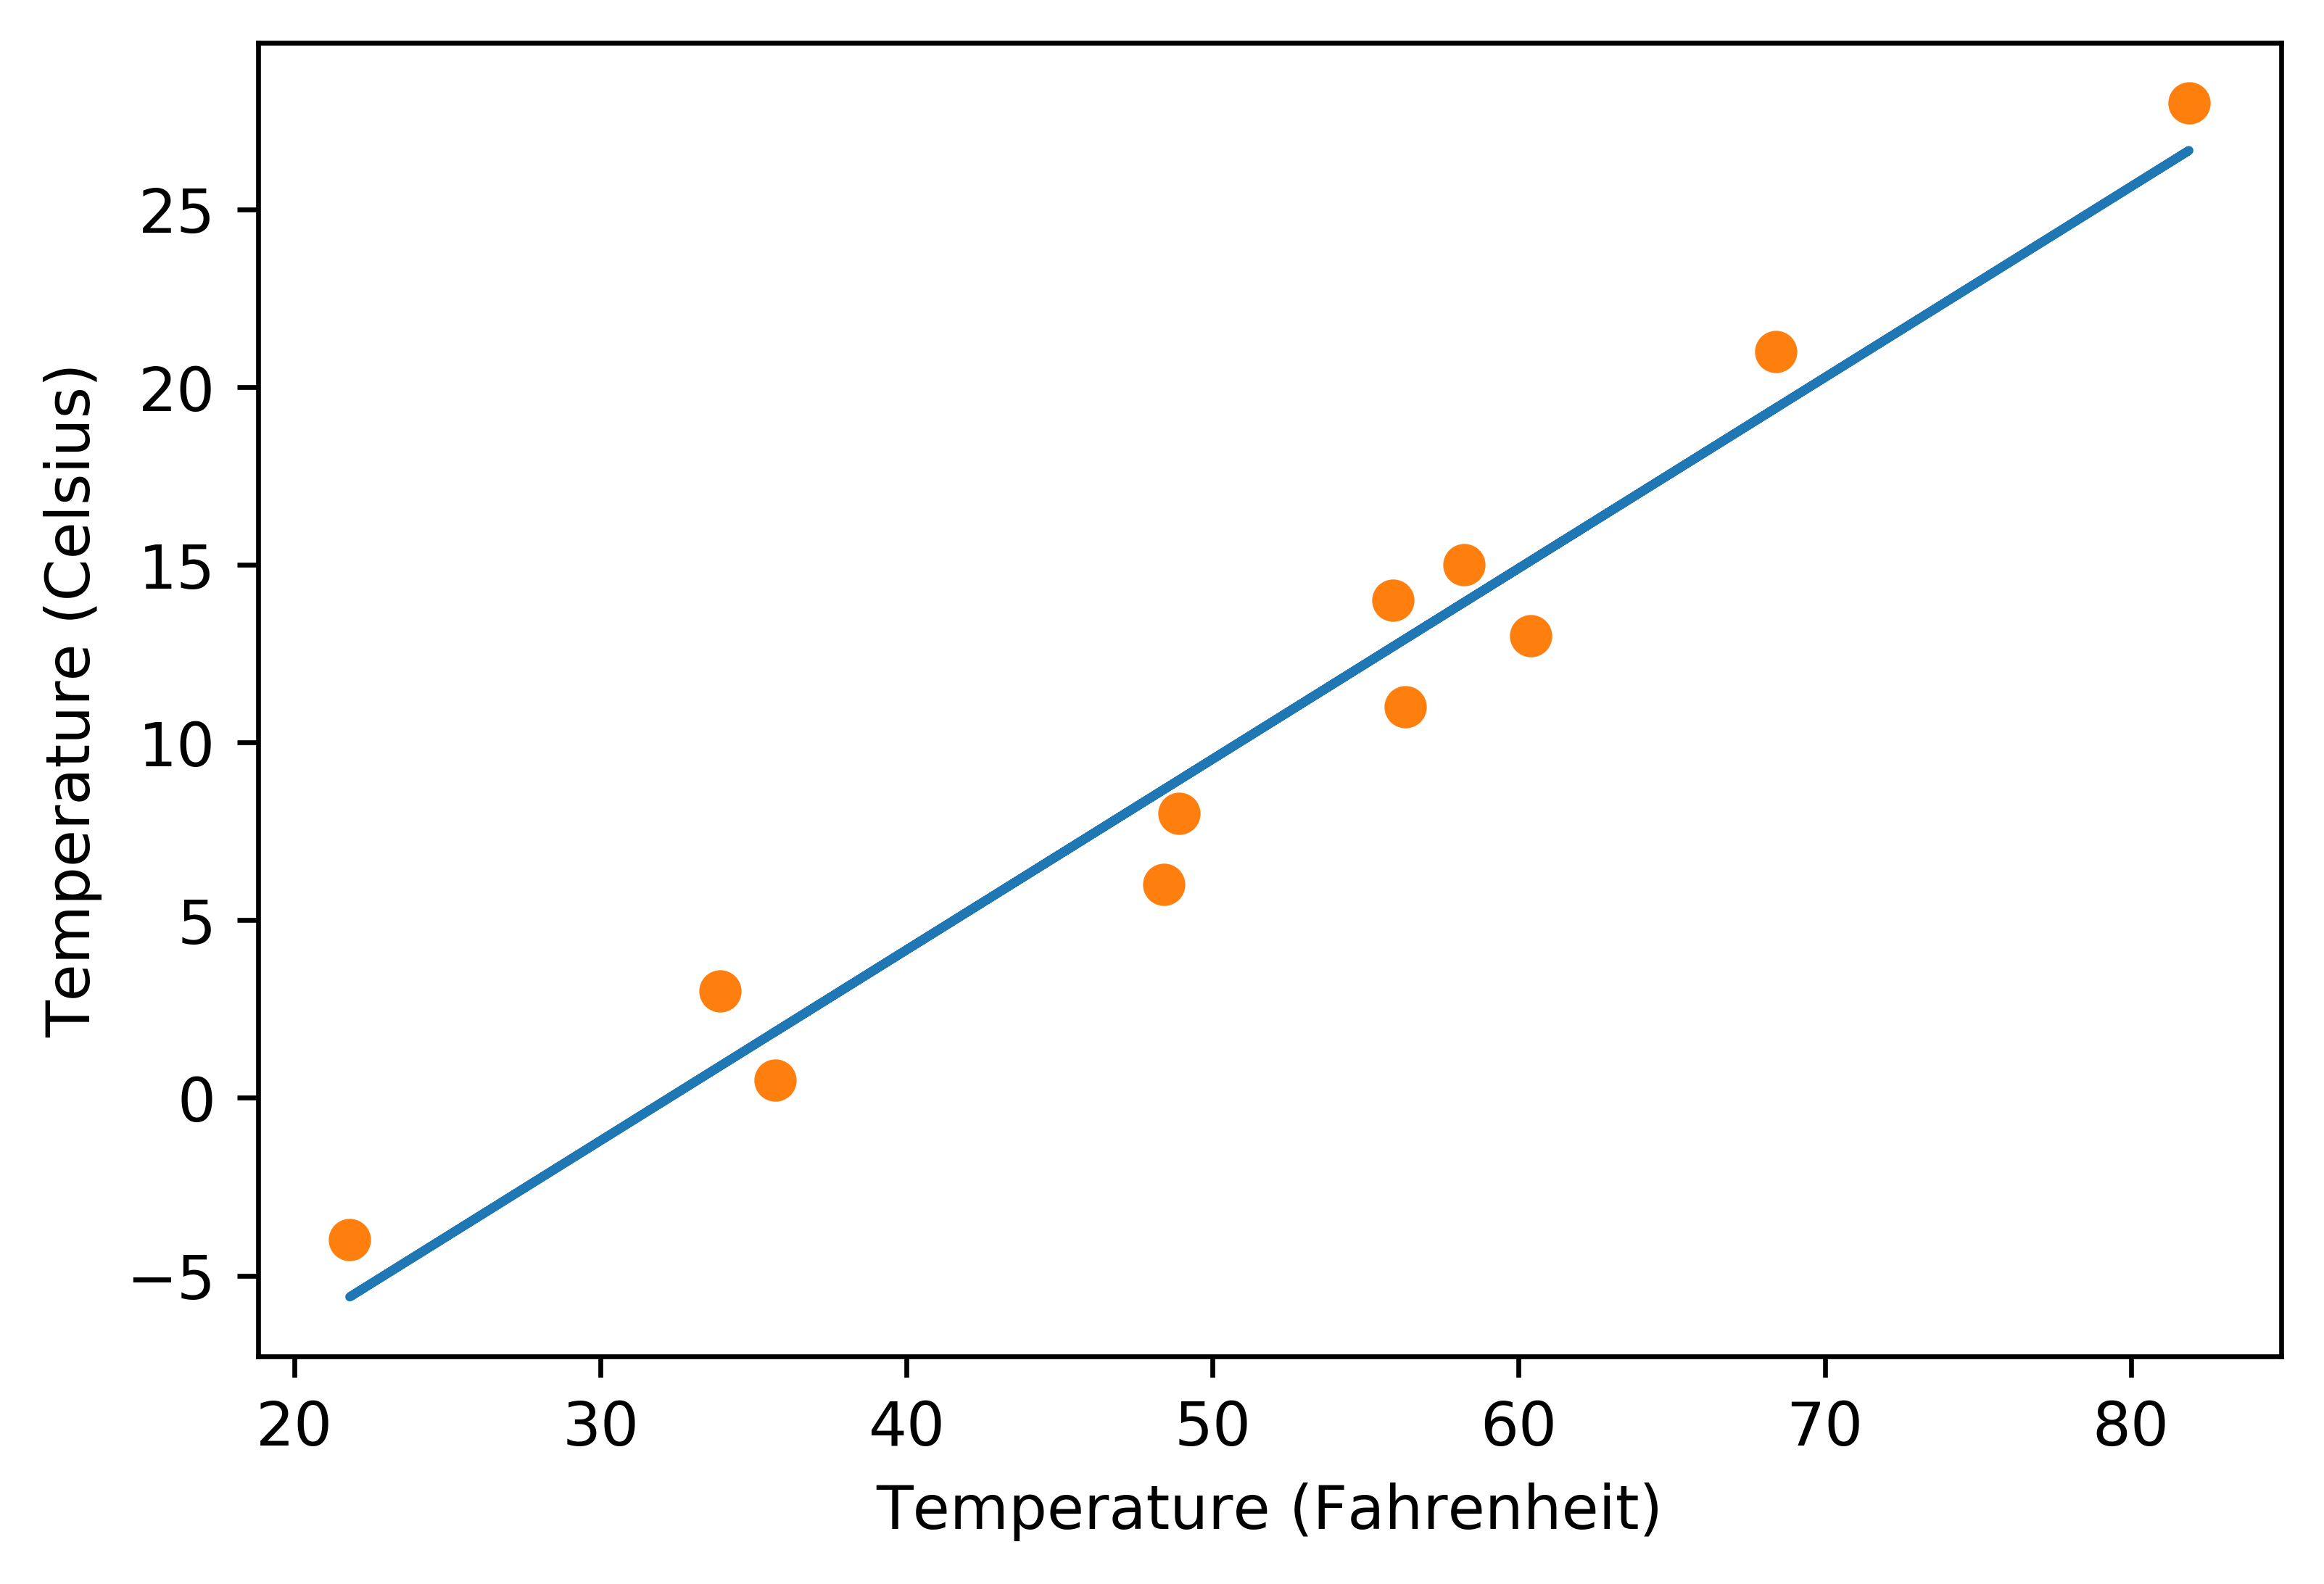

In [31]:
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')